In [20]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sys.path.append("../")

from lib.utils import *

In [12]:
source = 'abide_large'
target = 'abide_small'
seed = 1


In [13]:
A_s, X_s, Y_s, has_label_mask_s = load_graph_data('../data/'+str(source)+'.mat')
A_t, X_t, Y_t, has_label_mask_t = load_graph_data('../data/'+str(target)+'.mat')

Y=np.concatenate((Y_s, Y_t),axis=0)
source_mask = np.concatenate((np.ones(Y_s.shape[0],dtype=bool), np.zeros(Y_t.shape[0],dtype=bool)),axis=0)
target_mask = np.concatenate((np.zeros(Y_s.shape[0],dtype=bool), np.ones(Y_t.shape[0],dtype=bool)),axis=0)

In [14]:
layer = 'pre_transform'
path = f'../log/run/{source}__{target}/{seed}/hidden/{layer}.csv'

pre_data = pd.read_csv(path,header=None)
pre_data['label']=Y[:,1]
pre_data = pre_data.drop(columns=['label']).to_numpy()



layer = 'post_transform'
path = f'../log/run/{source}__{target}/{seed}/hidden/{layer}.csv'

post_data = pd.read_csv(path,header=None)
post_data['label']=Y[:,1]
post_data = post_data.drop(columns=['label']).to_numpy()

In [49]:
all_data = np.concatenate((pre_data,post_data[source_mask]))
all_y = Y=np.concatenate((Y_s, Y_t, Y_s),axis=0)

pre_mask = np.concatenate((source_mask, np.zeros(Y_s.shape[0],dtype=bool)),axis=0)
pre_mask = np.array(pre_mask, dtype=bool)

tar_mask = np.concatenate((target_mask, np.zeros(Y_s.shape[0],dtype=bool)),axis=0)
tar_mask = np.array(tar_mask, dtype=bool)

post_mask = np.concatenate((np.zeros(source_mask.shape[0],dtype=bool), np.ones(Y_s.shape[0],dtype=bool)),axis=0)
post_mask = np.array(post_mask, dtype=bool)
# post_mask
# tar_mask = np.zeros(all_data.shape[0])
# tar_mask[:pre_data.shape[0]]=target_mask

# post_mask = np.zeros(all_data.shape[0])
# post_mask = np.zeros(all_data.shape[0])[pre_data.shape[0]:]=1

In [50]:
pre_mask.shape

(1675,)

In [51]:


pca = PCA(n_components=2)
pca.fit(all_data)
pca_data = pca.transform(all_data)


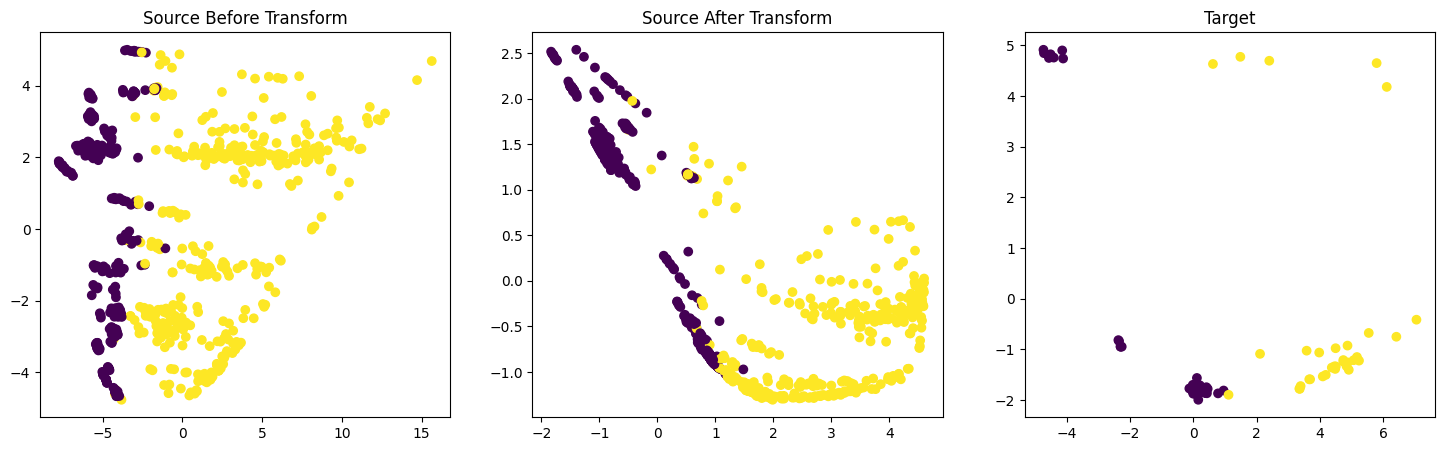

In [52]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(pca_data[pre_mask,0], pca_data[pre_mask,1],c=Y[pre_mask,1])
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(pca_data[post_mask,0], pca_data[post_mask,1],c=Y[post_mask,1])
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(pca_data[tar_mask,0], pca_data[tar_mask,1],c=Y[tar_mask,1])
plt.title('Target')

plt.show()

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(pre_data)
pre_pca = pca.transform(pre_data)
post_pca = pca.transform(post_data)

pre_pca_201 = pre_pca.copy()
post_pca_201 = post_pca.copy()

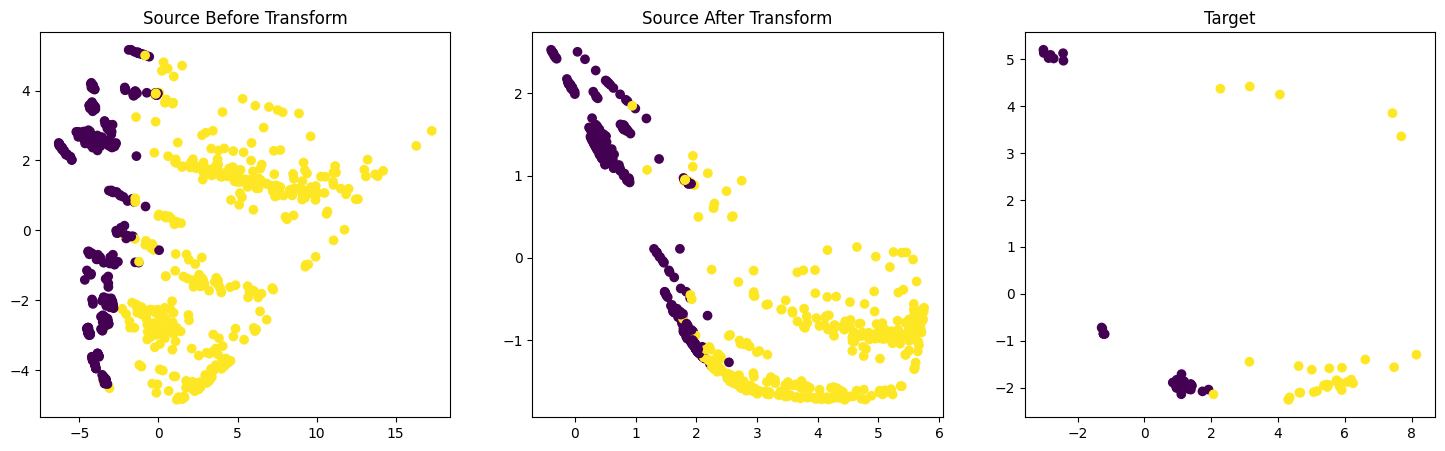

In [18]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(pre_pca[source_mask,0], pre_pca[source_mask,1],c=Y[source_mask,1])
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(post_pca[source_mask,0], post_pca[source_mask,1],c=Y[source_mask,1])
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(post_pca[target_mask,0], post_pca[target_mask,1],c=Y[target_mask,1])
plt.title('Target')

plt.show()

In [55]:
# from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
# temp = np.concatenate((pre_data, post_data[source_mask]),axis=0)
# s1_mask = np.concatenate((source_mask, np.zeros(source_mask.sum(),dtype=bool)),axis=0)
# t_mask = np.concatenate((target_mask, np.zeros(source_mask.sum(),dtype=bool)),axis=0)
# s2_mask = np.concatenate((np.zeros(source_mask.shape[0],dtype=bool), np.ones(source_mask.sum(),dtype=bool)),axis=0)
# Y=np.concatenate((Y_s, Y_t),axis=0)
all_tsne = tsne.fit_transform(all_data)

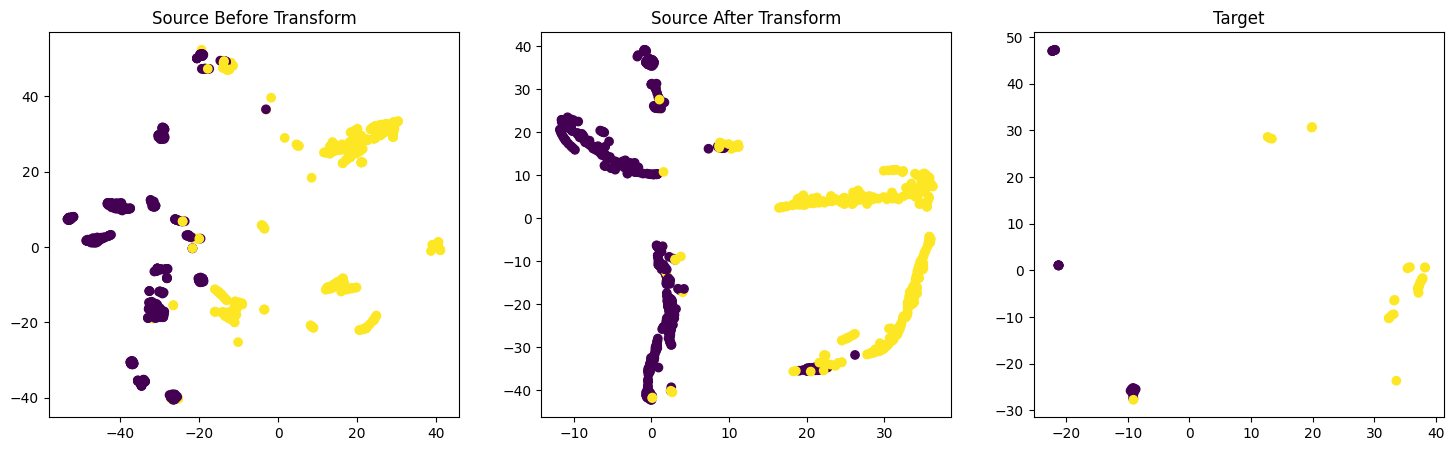

In [57]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(all_tsne[pre_mask,0], all_tsne[pre_mask,1],c=Y[pre_mask,1])
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(all_tsne[post_mask,0], all_tsne[post_mask,1],c=Y[post_mask,1])
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(all_tsne[tar_mask,0], all_tsne[tar_mask,1],c=Y[tar_mask,1])
plt.title('Target')

plt.show()

In [58]:
pre_pca_source_df = pd.DataFrame(pca_data[pre_mask]columns=['pc1','pc2'])
pre_pca_source_df['label'] = Y[pre_mask,1]

post_pca_source_df = pd.DataFrame(pca_data[post_mask],columns=['pc1','pc2'])
post_pca_source_df['label'] = Y[post_mask,1]

pca_target_df = pd.DataFrame(pca_data[tar_mask],columns=['pc1','pc2'])
pca_target_df['label'] = Y[tar_mask,1]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2196432642.py, line 1)

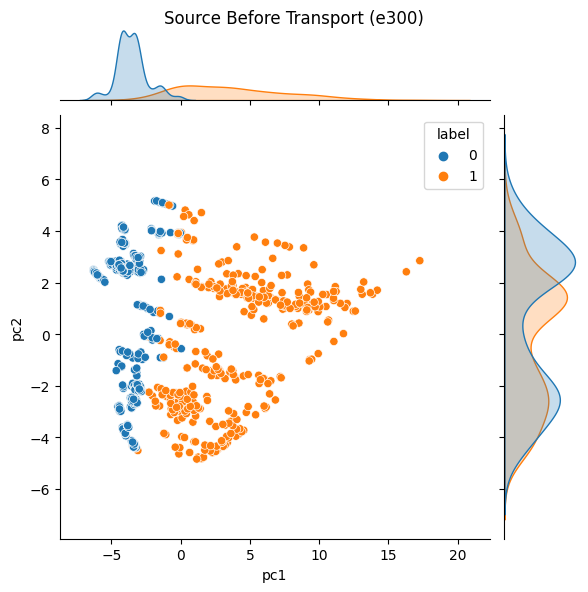

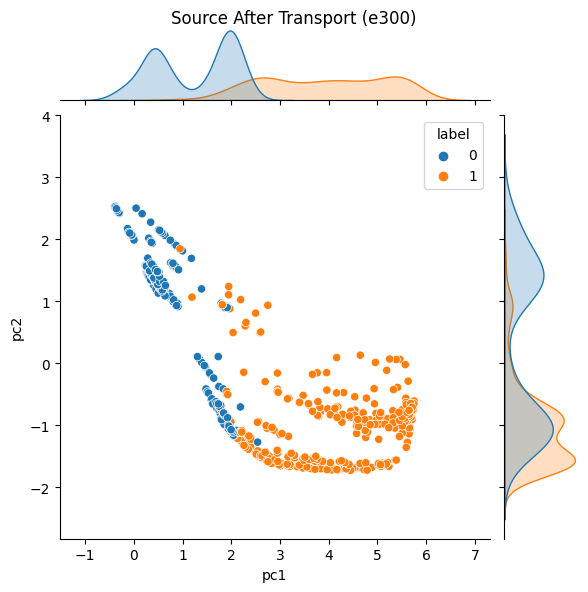

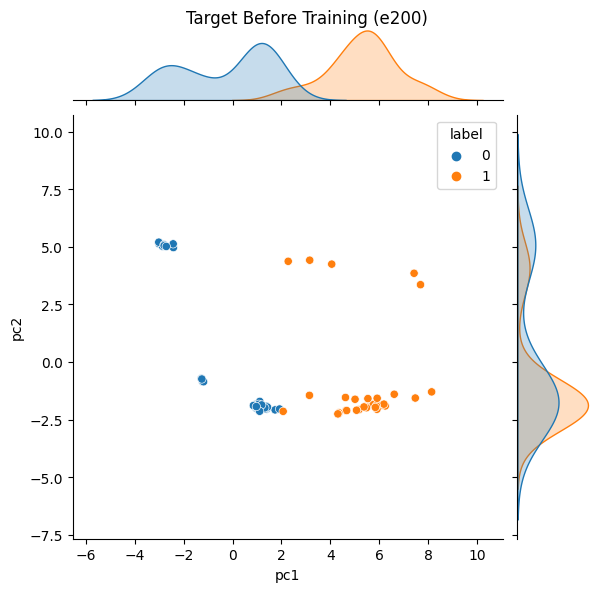

In [59]:

sns.jointplot(data=pre_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source Before Transport (e300)")
plt.subplots_adjust(top=0.95)


sns.jointplot(data=post_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

p=sns.jointplot(data=pca_target_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Target Before Training (e200)")
plt.subplots_adjust(top=0.95)

# pre_pca_target_300_df = pd.DataFrame(pre_pca[target_mask],columns=['pc1','pc2'])
# pre_pca_target_300_df['label'] = Y[target_mask,1]
# p=sns.jointplot(data=pre_pca_target_300_df, x="pc1", y="pc2",hue='label')
# plt.suptitle("Target After Training (e300)")
# plt.subplots_adjust(top=0.95)

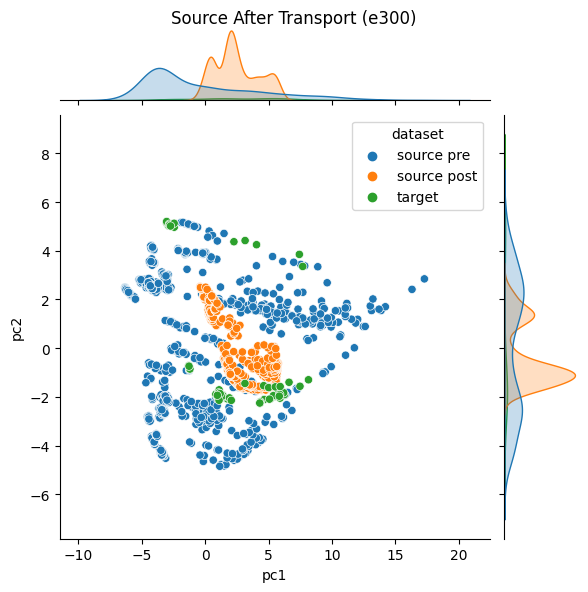

In [63]:

pre_pca_source_df['dataset'] = 'source pre'
post_pca_source_df['dataset'] = 'source post'
pca_target_df['dataset'] = 'target'

all = pd.concat([pre_pca_source_df,post_pca_source_df,pca_target_df])
# all = pd.DataFrame([pre_pca_source_df,post_pca_source_df,pca_target_df])

sns.jointplot(data=all, x="pc1", y="pc2",hue='dataset')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

In [62]:
pca_target_df.shape
post_pca_source_df.shape

(804, 4)